In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import glob
import os
import re
from shutil import copyfile
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
df = pd.read_pickle('networks.pickle')
df.shape

(29263, 12)

In [6]:
print(df.keys)

<bound method NDFrame.keys of        HBNet_NumUnsatHpol  HBNet_Score  HBNet_saturation  \
0                     0.0    -3.209780          0.428571   
1                     0.0    -2.699270          0.700000   
2                     0.0    -2.184770          0.400000   
3                     0.0    -1.726720          0.625000   
4                     0.0    -1.451310          0.555556   
5                     0.0    -3.138430          0.500000   
6                     0.0    -1.922110          0.545455   
7                     0.0    -3.306040          0.400000   
8                     0.0    -1.493730          0.545455   
9                     2.0    -2.839060          0.444444   
10                    0.0    -1.927540          0.625000   
11                    0.0    -2.506040          0.400000   
12                    0.0    -3.106820          0.538462   
13                    0.0    -2.998860          0.636364   
14                    0.0    -2.216010          0.647059   
15        

In [3]:
list_designs = []
with open("picked_from_round3/designs.list",'r') as list_file:
    for line in list_file:
        line = line.strip()
        pdb_name = line.replace('.pdb','')
        design_name = "_".join(pdb_name.split("_")[:-1])
        list_designs.append(design_name)
print(list_designs)

['0__input_0001_0002_1_0004_0001_0003', '0__input_0001_0002_1_0004_0001_0008', '0__input_0001_0004_1_0001_0007_0007', '0__input_0001_0004_2_0002_0001_0006', '0__input_0001_0004_5_0002_0002_0001', '0__input_0001_0004_5_0002_0002_0002', '0__input_0001_0004_5_0002_0002_0004', '0__input_0001_0004_5_0002_0002_0005', '0__input_0001_0004_5_0002_0002_0006', '0__input_0001_0004_5_0002_0002_0009', '0__input_0001_0004_5_0002_0002_0010', '0__input_0001_0005_4_0001_0001_0004', '0__input_0001_0005_4_0001_0001_0008', '0__input_0001_0005_4_0002_0002_0007', '0__input_0001_0005_4_0003_0002_0006', '10__input_0109_0002_3_0002_0001_0005', '10__input_0109_0002_4_0004_0009_0004', '10__input_0109_0003_1_0004_0001_0001', '10__input_0109_0003_3_0004_0008_0003', '11__input_0191_0001_2_0002_0010_0009', '11__input_0191_0001_2_0003_0004_0003', '11__input_0191_0001_2_0003_0004_0004', '11__input_0191_0001_2_0003_0004_0005', '11__input_0191_0001_2_0003_0004_0006', '11__input_0191_0001_2_0003_0004_0008', '11__input_019

In [9]:
dnetworks = df.loc[(df["description"].isin(list_designs)) & (df["tyrs"] >= 1.0)]
print(dnetworks)

       HBNet_NumUnsatHpol  HBNet_Score  HBNet_saturation  \
27                    0.0     -3.27545          0.666667   
43                    0.0     -2.43473          0.550000   
116                   0.0     -2.23426          0.480000   
144                   0.0     -2.44209          0.434783   
236                   0.0     -3.35784          0.650000   
241                   0.0     -3.20810          0.650000   
244                   1.0     -3.29066          0.650000   
246                   2.0     -3.49868          0.550000   
249                   1.0     -3.37506          0.666667   
258                   1.0     -3.29268          0.666667   
259                   1.0     -3.46504          0.650000   
400                   0.0     -3.11799          0.555556   
414                   0.0     -3.12384          0.550000   
437                   0.0     -2.60285          0.555556   
438                   0.0     -2.91194          0.480000   
461                   0.0     -3.20694  

In [18]:
net_pos = dnetworks.groupby("description")["network"].sum()
print(net_pos.loc[net_pos.index == "0__input_0001_0002_1_0004_0001_0003"].values)

TypeError: 'numpy.ndarray' object is not callable

In [24]:
with open("picked_from_round3/designs_round4.fasta", 'r') as fasta_file:
    ala_designs = {}
    for line in fasta_file:
        if line[0] == ">":
            pdb_name = line.strip()[1:]
            pdb = pdb_name.replace(".pdb","")
            design = "_".join(pdb_name.split("_")[:-1])
            sequence = next(fasta_file)
            network = net_pos.loc[net_pos.index == design].values[0]
            ala_seq = ""
            for pos in range(0, len(sequence)):
                if pos+1 in network:
                    ala_seq += sequence[pos]
                elif sequence[pos] in ["P", "G"]:
                    ala_seq += sequence[pos]
                else:
                    ala_seq += "A"
            ala_designs[pdb] = ala_seq

In [27]:
with open("picked_from_round3/designs_ala_round4.fasta", 'w') as fasta_out:
    for key in ala_designs:
        fasta_out.write(">"+key+".pdb\n"+ala_designs[key]+"\n")
        

In [5]:
designs = pd.read_pickle('picked_networks.pickle')
designs

tyrs  n_res_network  n_hbonds  \
description                                                          
0__input_0001_0002_1_0004_0001_0001   1.0           14.0      16.0   
0__input_0001_0002_1_0004_0001_0003   1.0           10.0      12.0   
0__input_0001_0002_1_0004_0001_0008   1.0           10.0      10.0   
0__input_0001_0002_2_0004_0002_0002   1.0           12.0      12.0   
0__input_0001_0004_1_0001_0007_0007   1.0            8.0       8.0   
0__input_0001_0004_2_0002_0001_0006   1.0            7.0       6.0   
0__input_0001_0004_2_0002_0001_0007   1.0            6.0       6.0   
0__input_0001_0004_2_0003_0009_0006   1.0           10.0      11.0   
0__input_0001_0004_4_0004             1.0            9.0       9.0   
0__input_0001_0004_5_0002_0002_0001   2.0           10.0      12.0   
0__input_0001_0004_5_0002_0002_0002   2.0            7.0       8.0   
0__input_0001_0004_5_0002_0002_0004   2.0            7.0       8.0   
0__input_0001_0004_5_0002_0002_0005   2.0           10.0      10.0   
0__input_0001_0004_5_0002_0002_0006   2.0           13.0      16.0   
0__input_0001_0004_5_0002_0002_0009   2.0            6.0       7.0   
0__input_0001_0004_5_0002_0002_0010   2.0           11.0      12.0   
0__input_0001_0004_5_0005_0007        1.0            4.0       4.0   
0__input_0001_0004_6_0005_0004_0009   2.0            6.0       6.0   
0__input_0001_0005_2_0003_0004_0002   1.0           16.0      19.0   
0__input_0001_0005_2_0003_0004_0006   1.0           14.0      16.0   
0__input_0001_0005_2_0005_0007_0001   1.0            7.0       6.0   
0__input_0001_0005_2_0005_0007_0004   1.0            8.0       7.0   
0__input_0001_0005_4_0001_0001_0004   2.0            6.0       6.0   
0__input_0001_0005_4_0001_0001_0008   2.0           12.0      16.0   
0__input_0001_0005_4_0002_0002        1.0            4.0       4.0   
0__input_0001_0005_4_0002_0002_0001   2.0           14.0      16.0   
0__input_0001_0005_4_0002_0002_0002   1.0           11.0      13.0   
0__input_0001_0005_4_0002_0002_0003   1.0           11.0      11.0   
0__input_0001_0005_4_0002_0002_0006   1.0            7.0       8.0   
0__input_0001_0005_4_0002_0002_0007   1.0            8.0       8.0   
...                                   ...            ...       ...   
7__input_0123_0004_1_0001_0003_0003   1.0           10.0      11.0   
7__input_0123_0004_2_0005_0008_0002   1.0           10.0      12.0   
7__input_0123_0004_3_0001_0001        1.0            9.0       9.0   
7__input_0123_0004_3_0001_0001_0002   1.0            9.0       9.0   
7__input_0123_0004_3_0001_0001_0003   1.0            8.0       9.0   
7__input_0123_0004_3_0001_0001_0004   1.0            9.0       9.0   
7__input_0123_0004_3_0001_0001_0005   1.0           11.0      13.0   
7__input_0123_0004_3_0001_0001_0007   1.0            5.0       7.0   
7__input_0123_0004_3_0001_0001_0008   1.0            8.0       8.0   
7__input_0123_0004_3_0001_0001_0009   1.0            8.0       9.0   
7__input_0123_0004_3_0001_0001_0010   1.0            9.0      10.0   
7__input_0123_0004_3_0004_0003        1.0            4.0       5.0   
7__input_0123_0004_3_0004_0003_0002   1.0           13.0      15.0   
7__input_0123_0004_3_0004_0003_0004   1.0            4.0       5.0   
7__input_0123_0004_3_0004_0003_0005   1.0           10.0      12.0   
7__input_0123_0004_3_0004_0003_0006   1.0           10.0      12.0   
7__input_0123_0004_3_0004_0003_0008   1.0            8.0       9.0   
7__input_0123_0004_4_0004_0009_0001   2.0           13.0      14.0   
7__input_0123_0004_4_0004_0009_0004   2.0           15.0      15.0   
7__input_0123_0004_4_0004_0009_0009   2.0           10.0      10.0   
7__input_0123_0004_5_0004_0003_0004   1.0            7.0       7.0   
7__input_0186_0001_1_0001_0007_0002   1.0           22.0      25.0   
7__input_0186_0001_1_0002_0004        1.0            8.0       9.0   
7__input_0186_0001_1_0005_0001_0001   1.0           12.0      14.0   
7__input_0186_0001_1_0005_0001_0005   1.0      

In [9]:
dpicked_designs = designs.loc[designs.index.isin(list_designs)]
dpicked_designs

tyrs  n_res_network  n_hbonds  \
description                                                           
0__input_0001_0002_1_0004_0001_0003    1.0           10.0      12.0   
0__input_0001_0002_1_0004_0001_0008    1.0           10.0      10.0   
0__input_0001_0004_1_0001_0007_0007    1.0            8.0       8.0   
0__input_0001_0004_2_0002_0001_0006    1.0            7.0       6.0   
0__input_0001_0004_5_0002_0002_0001    2.0           10.0      12.0   
0__input_0001_0004_5_0002_0002_0002    2.0            7.0       8.0   
0__input_0001_0004_5_0002_0002_0004    2.0            7.0       8.0   
0__input_0001_0004_5_0002_0002_0005    2.0           10.0      10.0   
0__input_0001_0004_5_0002_0002_0006    2.0           13.0      16.0   
0__input_0001_0004_5_0002_0002_0009    2.0            6.0       7.0   
0__input_0001_0004_5_0002_0002_0010    2.0           11.0      12.0   
0__input_0001_0005_4_0001_0001_0004    2.0            6.0       6.0   
0__input_0001_0005_4_0001_0001_0008    2.0           12.0      16.0   
0__input_0001_0005_4_0002_0002_0007    1.0            8.0       8.0   
0__input_0001_0005_4_0003_0002_0006    2.0           12.0      16.0   
10__input_0109_0002_3_0002_0001_0005   1.0            7.0       8.0   
10__input_0109_0002_4_0004_0009_0004   1.0            6.0       6.0   
10__input_0109_0003_1_0004_0001_0001   1.0           11.0      12.0   
10__input_0109_0003_3_0004_0008_0003   1.0           10.0      13.0   
11__input_0191_0001_2_0002_0010_0009   1.0            8.0      10.0   
11__input_0191_0001_2_0003_0004_0003   1.0           15.0      18.0   
11__input_0191_0001_2_0003_0004_0004   1.0           15.0      20.0   
11__input_0191_0001_2_0003_0004_0005   1.0           11.0      11.0   
11__input_0191_0001_2_0003_0004_0006   1.0           12.0      15.0   
11__input_0191_0001_2_0003_0004_0008   1.0            6.0       8.0   
11__input_0191_0001_2_0003_0004_0009   1.0            9.0      11.0   
11__input_0191_0001_2_0005_0005_0004   1.0            4.0       4.0   
11__input_0191_0001_5_0003_0005_0001   1.0            4.0       4.0   
11__input_0191_0001_5_0003_0005_0005   1.0            9.0      10.0   
11__input_0191_0001_5_0004_0006_0001   1.0           16.0      20.0   
...                                    ...            ...       ...   
6__input_0181_0002_4_0005_0008         2.0            9.0      11.0   
6__input_0181_0005_1_0004_0005_0008    1.0            7.0       7.0   
6__input_0181_0005_5_0004_0002_0004    1.0           14.0      16.0   
6__input_0181_0005_5_0005_0005         1.0           14.0      17.0   
6__input_0181_0005_5_0005_0005_0010    1.0           10.0      12.0   
6__input_0181_0005_7_0003_0002_0001    1.0           11.0      15.0   
6__input_0181_0005_7_0003_0002_0008    1.0            8.0       9.0   
6__input_0181_0005_7_0005_0004_0004    1.0            7.0       8.0   
7__input_0123_0003_1_0002_0002_0006    1.0            8.0       7.0   
7__input_0123_0003_1_0003_0008_0006    1.0            8.0       9.0   
7__input_0123_0003_5_0001_0003_0002    1.0            9.0      10.0   
7__input_0123_0003_5_0001_0003_0004    1.0            5.0       5.0   
7__input_0123_0003_5_0001_0003_0005    1.0           11.0      11.0   
7__input_0123_0003_5_0001_0003_0006    2.0           19.0      20.0   
7__input_0123_0004_2_0005_0008_0002    1.0           10.0      12.0   
7__input_0123_0004_3_0001_0001_0004    1.0            9.0       9.0   
7__input_0123_0004_3_0004_0003         1.0            4.0       5.0   
7__input_0123_0004_3_0004_0003_0002    1.0           13.0      15.0   
7__input_0123_0004_3_0004_0003_0004    1.0            4.0       5.0   
7__input_0123_0004_3_0004_0003_0005    1.0           10.0      12.0   
7__input_0123_0004_3_0004_0003_0006    1.0           10.0      12.0   
7__input_0123_0004_3_0004_0003_0008    1.0            8.0       9.0   
7__input_0123_0004_4_0004_0009_0001    2.0           13.0      14.0   
7__input_0123_0004_4_0004_0009_0009    2.0           10.0     

In [19]:
Y10 = dpicked_designs.loc[(dpicked_designs["tyr10_n_res"] > 0.0) & (dpicked_designs["tyr68_n_res"] == 0.0)].index
Y68 = dpicked_designs.loc[(dpicked_designs["tyr68_n_res"] > 0.0) & (dpicked_designs["tyr10_n_res"] == 0.0)].index
Y10_Y68 = dpicked_designs.loc[(dpicked_designs["tyr10_n_res"] > 0.0) & (dpicked_designs["tyr68_n_res"] > 0.0)].index
len(Y10),len(Y68),len(Y10_Y68)

(91, 492, 192)

In [20]:
for model in range(0,len(Y10)):
    pdb = Y10[model]
    for pdb_id in glob.glob("picked_from_round3/" + pdb + "_*.pdb"):
        source = pdb_id
        final_pdb = os.path.basename(pdb_id)
        target = "picked_from_round3/Y10/" + final_pdb
        copyfile(source, target)

In [23]:
dpicked_designs["net_description"] = np.nan

for index, row in dpicked_designs.iterrows():
    net_description = ""
    if row["tyr10_n_res"] > 0.0 and row["tyr68_n_res"] == 0.0:
        net_description += "Y10"
    elif row["tyr10_n_res"] == 0.0 and row["tyr68_n_res"] > 0.0:
        net_description += "Y68"
    elif row["tyr10_n_res"] > 0.0 and row["tyr68_n_res"] > 0.0:
        net_description += "Y10_Y68"
    cst = row["network_cst"]
    cst_lines = cst.split("\n")
    for line in cst_lines:
        if " OH 10 " in line:
            

# 0__input_0001_0002_1_0004_0001_0003_0001_native_network_1.cst
# 
# angle_AHD = 159.289, angle_BAH = 134.879, dist_AH = 1.77115134.879, unweighted hb_energy = -1.44726
AtomPair  OE2 24  OH  10 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 148.145, angle_BAH = 118.021, dist_AH = 2.05828118.021, unweighted hb_energy = -1.45453
AtomPair  OH  10  NH1 38 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 116.592, angle_BAH = 134.678, dist_AH = 2.1801134.678, unweighted hb_energy = -0.588901
AtomPair  OE2 24  NH1 38 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 154.304, angle_BAH = 155.361, dist_AH = 1.82773155.361, unweighted hb_energy = -0.537516
AtomPair  OE1 24  NZ  52 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 178.224, angle_BAH = 123.708, dist_AH = 1.69859123.708, unweighted hb_energy = -1.33824
AtomPair  OD2 70  NE  38 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 171.415, angle_BAH = 113.46, dist_AH = 2.00997113.46, unweighted hb_energy = -1.69057
AtomPair  OD1 70  NH2 38 BOUNDED 2.6 3.01317 0.2 hbond
# 0__input_0001_0002_1

# angle_AHD = 156.79, angle_BAH = 129.354, dist_AH = 1.68644129.354, unweighted hb_energy = -1.34215
AtomPair  OE1 102  OH  68 BOUNDED 2.39704 2.79704 0.2 hbond
# angle_AHD = 141.796, angle_BAH = 145.87, dist_AH = 2.21597145.87, unweighted hb_energy = -0.525176
AtomPair  OE1 102  NE  100 BOUNDED 2.6 3.07428 0.2 hbond
# angle_AHD = 150.72, angle_BAH = 131.019, dist_AH = 1.94654131.019, unweighted hb_energy = -1.45099
AtomPair  OE1 102  NH2 100 BOUNDED 2.6 3 0.2 hbond

# 13__input_0157_0001_2_0004_0009_0008_0001_native_network_1.cst
# 
# angle_AHD = 162.838, angle_BAH = 113.355, dist_AH = 2.47608113.355, unweighted hb_energy = -1.09212
AtomPair  OG  38  NH2 100 BOUNDED 2.6 3.45429 0.2 hbond
# angle_AHD = 137.062, angle_BAH = 128.853, dist_AH = 2.08126128.853, unweighted hb_energy = -0.907745
AtomPair  OH  68  NE  100 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 154.628, angle_BAH = 133.987, dist_AH = 1.71664133.987, unweighted hb_energy = -1.36352
AtomPair  OE1 102  OH  68 BOUNDED 2.6 3 0.2 hbo

AtomPair  OE1 28  NZ  68 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 174.619, angle_BAH = 117.766, dist_AH = 1.99866117.766, unweighted hb_energy = -1.47713
AtomPair  OD2 38  NH1 70 BOUNDED 2.6 3.00561 0.2 hbond
# angle_AHD = 148.267, angle_BAH = 115.753, dist_AH = 1.68939115.753, unweighted hb_energy = -0.670579
AtomPair  OD2 90  NZ  68 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 173.474, angle_BAH = 120.728, dist_AH = 1.76836120.728, unweighted hb_energy = -0.812556
AtomPair  OD1 90  OG1 100 BOUNDED 2.6 3 0.2 hbond

# 15__input_0005_0002_4_0001_0007_0006_0001_native_network_3.cst
# 
# angle_AHD = 178.907, angle_BAH = 137.27, dist_AH = 1.73124137.27, unweighted hb_energy = -1.56074
AtomPair  OD1 38  OH  10 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 165.029, angle_BAH = 101.591, dist_AH = 2.02691101.591, unweighted hb_energy = -0.749077
AtomPair  OD2 38  NE2 28 BOUNDED 2.6 3.00368 0.2 hbond
# angle_AHD = 149.975, angle_BAH = 126.738, dist_AH = 2.05831126.738, unweighted hb_energy = -0.768429
AtomPair  

AtomPair  OE2 84  NH1 70 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 142.384, angle_BAH = 117.558, dist_AH = 1.88113117.558, unweighted hb_energy = -0.456858
AtomPair  OE2 84  NH2 70 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 171.813, angle_BAH = 108.554, dist_AH = 1.82895108.554, unweighted hb_energy = -1.40833
AtomPair  OD1 102  NE  70 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 161.927, angle_BAH = 115.56, dist_AH = 1.74733115.56, unweighted hb_energy = -0.885634
AtomPair  OD2 102  NH2 70 BOUNDED 2.6 3 0.2 hbond
# 1__input_0178_0004_3_0002_0002_0006_0001_native_network_3.cst
# 
# angle_AHD = 50.6621, angle_BAH = 92.4565, dist_AH = 4.0102392.4565, unweighted hb_energy = -1.00972
AtomPair  OD1 18  CB  20 BOUNDED 2.6 3.26546 0.2 hbond
# angle_AHD = 135.268, angle_BAH = 136.17, dist_AH = 1.75792136.17, unweighted hb_energy = -0.338008
AtomPair  OD2 18  NZ  110 BOUNDED 2.37605 2.77605 0.2 hbond
# angle_AHD = 167.991, angle_BAH = 114.405, dist_AH = 1.81141114.405, unweighted hb_energy = -1.4142
AtomPair  

AtomPair  OE2 100  NE2 90 BOUNDED 2.6 3 0.2 hbond

# 27__input_0044_0004_5_0004_0005_0003_0001_native_network_1.cst
# 
# angle_AHD = 167.097, angle_BAH = 135.265, dist_AH = 1.72977135.265, unweighted hb_energy = -1.54321
AtomPair  OE2 24  OH  10 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 167.725, angle_BAH = 100.626, dist_AH = 1.81202100.626, unweighted hb_energy = -0.586556
AtomPair  OE1 24  OG  52 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 148.669, angle_BAH = 125.999, dist_AH = 1.84529125.999, unweighted hb_energy = -0.779916
AtomPair  OE1 24  NH1 114 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 135.232, angle_BAH = 101.985, dist_AH = 2.21778101.985, unweighted hb_energy = -0.331918
AtomPair  OE1 24  NH2 114 BOUNDED 2.6 3.01921 0.2 hbond
# angle_AHD = 174.914, angle_BAH = 119.777, dist_AH = 1.89699119.777, unweighted hb_energy = -1.14463
AtomPair  OE1 102  OH  68 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 167.87, angle_BAH = 117.684, dist_AH = 1.99736117.684, unweighted hb_energy = -1.23224
AtomPair  OE1

AtomPair  OE2 28  NZ  90 BOUNDED 2.6 3 0.2 hbond

# 29__input_0181_0004_1_0001_0004_0001_native_network_1.cst
# 
# angle_AHD = 160.777, angle_BAH = 131.367, dist_AH = 2.09373131.367, unweighted hb_energy = -1.61102
AtomPair  OE1 38  NH2 100 BOUNDED 2.6 3.06462 0.2 hbond
# angle_AHD = 154.877, angle_BAH = 126.58, dist_AH = 2.04034126.58, unweighted hb_energy = -1.57245
AtomPair  OH  68  NE  100 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 170.73, angle_BAH = 122.736, dist_AH = 1.82234122.736, unweighted hb_energy = -1.66481
AtomPair  OE1 102  OH  68 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 160.247, angle_BAH = 148.39, dist_AH = 2.01676148.39, unweighted hb_energy = -1.07149
AtomPair  OE1 102  NH2 100 BOUNDED 2.6 3 0.2 hbond
# 29__input_0181_0004_1_0001_0004_0001_native_network_2.cst
# 
# angle_AHD = 158.393, angle_BAH = 124.932, dist_AH = 1.94971124.932, unweighted hb_energy = -1.69492
AtomPair  OE2 8  NE1 30 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 149.634, angle_BAH = 111.637, dist_AH = 1.96192111

AtomPair  OE2 118  OG1 28 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 163.507, angle_BAH = 111.73, dist_AH = 1.838111.73, unweighted hb_energy = -1.63001
AtomPair  OG1 38  NH1 100 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 127.971, angle_BAH = 127.678, dist_AH = 2.08612127.678, unweighted hb_energy = -0.487494
AtomPair  OH  68  NE  100 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 160.791, angle_BAH = 130.722, dist_AH = 1.75166130.722, unweighted hb_energy = -1.54512
AtomPair  OE1 102  OH  68 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 140.598, angle_BAH = 134.935, dist_AH = 2.18123134.935, unweighted hb_energy = -0.456652
AtomPair  OE1 102  NE  100 BOUNDED 2.6 3.03169 0.2 hbond
# angle_AHD = 151.455, angle_BAH = 127.005, dist_AH = 1.86831127.005, unweighted hb_energy = -1.4458
AtomPair  OE1 102  NH2 100 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 139.654, angle_BAH = 139.26, dist_AH = 1.83402139.26, unweighted hb_energy = -0.337404
AtomPair  OE2 118  NH1 100 BOUNDED 2.6 3 0.2 hbond
# 31__input_0125_0001_1_0002_0001

# angle_AHD = 167.227, angle_BAH = 102.054, dist_AH = 2.04801102.054, unweighted hb_energy = -0.917384
AtomPair  OE2 102  NH2 38 BOUNDED 2.6 3.04199 0.2 hbond
# angle_AHD = 171.612, angle_BAH = 130.043, dist_AH = 1.79207130.043, unweighted hb_energy = -1.49882
AtomPair  OE1 102  OH  68 BOUNDED 2.6 3 0.2 hbond
# 33__input_0063_0005_1_0004_0009_0001_native_network_3.cst
# 
# angle_AHD = 137.64, angle_BAH = 149.174, dist_AH = 1.81588149.174, unweighted hb_energy = -0.717818
AtomPair  OD2 18  NE  110 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 157.464, angle_BAH = 126.154, dist_AH = 1.86605126.154, unweighted hb_energy = -1.37749
AtomPair  OD1 106  N   110 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 166.231, angle_BAH = 140.098, dist_AH = 2.19455140.098, unweighted hb_energy = -1.27207
AtomPair  OD2 106  NH1 110 BOUNDED 2.6 3.18452 0.2 hbond
# angle_AHD = 140.365, angle_BAH = 126.425, dist_AH = 1.84312126.425, unweighted hb_energy = -1.23104
AtomPair  OD2 108  NH1 110 BOUNDED 2.6 3 0.2 hbond
# 33__inp

AtomPair  OE1 102  NH2 100 BOUNDED 2.6 3.01466 0.2 hbond
# 37__input_0004_0001_7_0004_0004_0009_0001_native_network_2.cst
# 
# angle_AHD = 165.026, angle_BAH = 126.306, dist_AH = 1.82281126.306, unweighted hb_energy = -1.61915
AtomPair  OE2 24  OH  10 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 167.102, angle_BAH = 162.483, dist_AH = 1.78428162.483, unweighted hb_energy = -0.702041
AtomPair  OE1 112  NZ  22 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 153.421, angle_BAH = 110.475, dist_AH = 1.82608110.475, unweighted hb_energy = -1.04212
AtomPair  OE2 24  OG  52 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 153.295, angle_BAH = 120.979, dist_AH = 1.74154120.979, unweighted hb_energy = -0.65224
AtomPair  OE1 24  NH1 114 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 156.063, angle_BAH = 147.984, dist_AH = 1.759147.984, unweighted hb_energy = -1.02596
AtomPair  OE2 112  NE  114 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 135.688, angle_BAH = 143.54, dist_AH = 2.22648143.54, unweighted hb_energy = -0.766039
AtomPair  OE2 11

# angle_AHD = 171.191, angle_BAH = 122.084, dist_AH = 1.95488122.084, unweighted hb_energy = -1.802
AtomPair  OE2 102  NZ  70 BOUNDED 2.6 3 0.2 hbond

# 40__input_0108_0005_5_0005_0001_native_network_2.cst
# 
# angle_AHD = 175.927, angle_BAH = 124.011, dist_AH = 1.69404124.011, unweighted hb_energy = -1.57881
AtomPair  OD1 38  OH  10 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 170.421, angle_BAH = 163.551, dist_AH = 1.92594163.551, unweighted hb_energy = -0.88063
AtomPair  OD2 38  NH2 100 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 142.232, angle_BAH = 129.284, dist_AH = 1.98959129.284, unweighted hb_energy = -1.10301
AtomPair  OH  68  NE  100 BOUNDED 2.6 3 0.2 hbond
# angle_AHD = 154.331, angle_BAH = 132.554, dist_AH = 1.69298132.554, unweighted hb_energy = -1.34581
AtomPair  OE1 102  OH  68 BOUNDED 2.39204 2.79204 0.2 hbond
# angle_AHD = 137.731, angle_BAH = 142.684, dist_AH = 2.2774142.684, unweighted hb_energy = -0.32232
AtomPair  OE1 102  NE  100 BOUNDED 2.6 3.10084 0.2 hbond
# angle_AHD = 14

KeyboardInterrupt: 

In [13]:
dres_num = [7,8,9,10,11,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,60,61,65,66,67,68,69,70,71,72,73,74,75,81,82,83,84,85,86,87,88,89,90,91,92,93,97,98,99,100,101,102,103,104,105,111,112,113,114,115,116,117,118,119,120,121]
dres_num_surf = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121]
dres_num_core = [8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120]
dres_num_bound = [7,15,21,31,35,43,49,61,65,75,81,93,97,105,111,121]

#keys = list(range(0,123))
aa_count = {k: [] for k in list(range(0,123))}

list_designs = []
with open("picked_from_round3/designs_round4.fasta",'r') as fasta_file:
    for line in fasta_file:
        if line[0] == ">":
            design_name = line.strip()
            aa_sequence = next(fasta_file).strip()
            for pos in range(0,len(aa_sequence)):
                aa_count[pos].append(aa_sequence[pos])
aa_per_pos = {l: list(set(aa_count[l])) for l in aa_count}
print(aa_count)


{0: ['G', 'G', 'A', 'G', 'S', 'S', 'S', 'S', 'A', 'S', 'A', 'S', 'S', 'S', 'S', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'P', 'P', 'P', 'K', 'Q', 'S', 'S', 'S', 'E', 'Q', 'Q', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'P', 'P', 'P', 'S', 'T', 'T', 'T', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'Q', 'S', 'K', 'T', 'T', 'T', 'K', 'K', 'D', 'D', 'G', 'S', 'Q', 'S', 'K', 'S', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'P', 'P', 'P', 'P', 'P', 'P', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'S', 'S', 'S', 'G', 'A', 'T', 'T', 'A', 'T', 'G', 'S', 'T', 'T', 'T', 'T', 'S', 'K', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'G', 'G', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'G', 'G', 

In [2]:
score_names = ["description","fa_atr","fa_rep","fa_sol","fa_intra_rep","fa_intra_sol_xover4","lk_ball_wtd","fa_elec","pro_close","hbond_sr_bb","hbond_lr_bb","hbond_bb_sc","hbond_sc","dslf_fa13","omega","fa_dun","p_aa_pp","yhh_planarity","ref","rama_prepro","total"]
dscore = pd.DataFrame(columns=score_names)

for design in glob.glob("round4/*.pdb"):
    pdb_name = os.path.basename(design)
    description = os.path.splitext(pdb_name)[0]
    scores_list = [description]
    with open(design, 'r') as pdb_in:
        for line in pdb_in:
            if "pose " in line:
                scores = [float(x) for x in line.replace("pose ", "").split(" ")]
                scores_list += scores
                ds = pd.DataFrame([scores_list], columns=score_names)
                dscore = dscore.append(ds, ignore_index=True)
dscore = dscore.set_index("description")
print(dscore)
                

                                             fa_atr   fa_rep   fa_sol  \
description                                                             
48__input_0034_0001_8_0002_0009_0007_0008  -589.527  79.9200  416.804   
34__input_0020_0003_11_0004_0002_0002_0003 -604.430  85.9471  407.885   
17__input_0087_0002_4_0003_0008_0003_0003  -624.212  83.2744  390.798   
13__input_0017_0005_2_0005_0001_0003_0006  -592.194  78.6864  398.596   
5__input_0163_0005_3_0004_0009_0002_0009   -577.851  80.1489  401.515   
47__input_0010_0002_4_0001_0008_0006_0002  -595.474  82.8794  398.335   
31__input_0119_0002_1_0005_0010_0003_0002  -598.737  85.5667  427.415   
47__input_0037_0004_8_0002_0004_0010_0006  -619.176  88.9892  423.635   
6__input_0142_0005_1_0005_0003_0002_0010   -590.736  82.5348  413.732   
13__input_0135_0004_3_0002_0009_0004_0002  -620.510  85.6329  427.719   
31__input_0125_0001_1_0002_0001_0009_0009  -604.888  83.7284  412.767   
45__input_0044_0001_1_0001_0003_0001_0002  -620.249

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


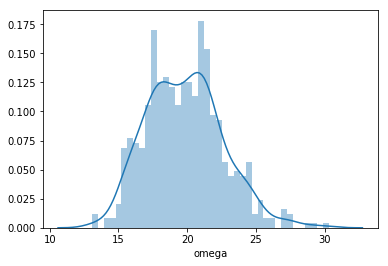

In [16]:
sns.distplot(dscore["omega"], bins=40)

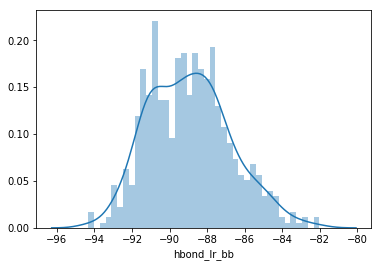

In [17]:
sns.distplot(dscore["hbond_lr_bb"], bins=40)

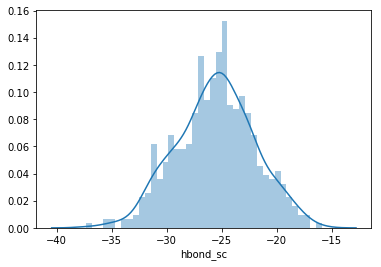

In [18]:
sns.distplot(dscore["hbond_sc"], bins=40)

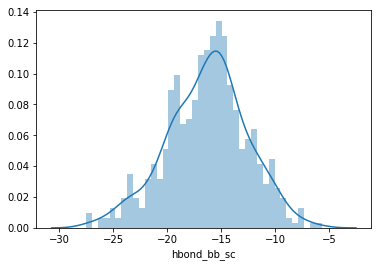

In [19]:
sns.distplot(dscore["hbond_bb_sc"], bins=40)

In [3]:
import pyrosetta as py
py.init()

core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: 2019.01+HEAD.dbc838b6ae6 dbc838b6ae620b1293476b1bd4366ffc2facc5b5 ssh://git@github.com/RosettaCommons/main 2019-01-03T10:31:13
core.init: command: PyRosetta -ex1 -ex2aro -database /software/conda/envs/pyrosetta/lib/python3.7/site-packages/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=-1482534663 seed_offset=0 real_seed=-1482534663
core.init.random: RandomGenerator:init: Normal mode, seed=-1482534663 RG_type=mt19937


In [4]:
hbond_set = py.rosetta.core.scoring.hbonds.HBondSet()
pdb_list = dscore.index.tolist()
score_per_hbond = pd.DataFrame(columns=["score_per_hbond"])

for pdb in pdb_list:
    pose = py.pose_from_pdb("round4/" + pdb + ".pdb")
    pose.update_residue_neighbors()
    n_hbond_sc = 0.0
    py.rosetta.core.scoring.hbonds.fill_hbond_set(pose, False, hbond_set)
    for i in range(1, hbond_set.nhbonds()+1):
        if hbond_set.hbond(i).acc_atm_is_backbone() == False and hbond_set.hbond(i).don_hatm_is_backbone() == False:
            n_hbond_sc += 1.0
    score_per_hbond.loc[pdb] = dscore["hbond_sc"].loc[pdb]/n_hbond_sc
print(score_per_hbond)

core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 636 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 0.80605 seconds.
core.import_pose.import_pose: File 'round4/48__input_0034_0001_8_0002_0009_0007_0008.pdb' automatically determined to be of type PDB
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBPoly1D.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBFadeIntervals.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBEval.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/DonStrength.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/AccStrength.csv
core.import_pose.import_pose: File 'round4/34__input_0020_0003_11_0004_0002_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose:

core.import_pose.import_pose: File 'round4/3__input_0182_0003_5_0003_0007_0003_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/46__input_0133_0003_1_0001_0010_0010_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/6__input_0181_0002_1_0002_0007_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/33__input_0063_0005_1_0001_0001_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/11__input_0191_0003_5_0002_0006_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/47__input_0010_0003_5_0003_0009_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/0__input_0001_0005_4_0001_0001_0008_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/32__input_0048_0002_1_0005_00

core.import_pose.import_pose: File 'round4/28__input_0038_0005_1_0002_0006_0004_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/5__input_0163_0001_8_0004_0009_0008_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/27__input_0044_0004_5_0005_0005_0006_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/49__input_0046_0001_1_0005_0009_0008_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/41__input_0008_0002_4_0004_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/13__input_0177_0004_3_0001_0001_0002_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/27__input_0044_0004_5_0004_0005_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/4__input_0078_0004_2_0002_0004_0005_0

core.import_pose.import_pose: File 'round4/1__input_0029_0004_1_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/31__input_0119_0002_1_0001_0009_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/17__input_0087_0002_4_0003_0008_0002_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/49__input_0046_0001_1_0005_0009_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/6__input_0181_0002_4_0002_0002_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/15__input_0183_0002_2_0003_0003_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/3__input_0182_0003_2_0003_0009_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/29__input_0181_0004_1_0004_0002_0002_00

core.import_pose.import_pose: File 'round4/27__input_0044_0004_5_0004_0005_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/0__input_0001_0004_5_0002_0002_0004_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/1__input_0029_0004_2_0005_0008_0002_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/31__input_0119_0002_2_0002_0001_0009_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/31__input_0119_0002_2_0002_0001_0006_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/34__input_0020_0003_7_0002_0002_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/6__input_0085_0003_1_0005_0002_0008_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/30__input_0014_0005_10_0003_0

core.import_pose.import_pose: File 'round4/27__input_0044_0004_5_0005_0005_0007_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/4__input_0078_0001_2_0001_0001_0010_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/30__input_0014_0002_2_0002_0007_0009_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/32__input_0133_0003_15_0002_0008_0002_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/7__input_0186_0001_1_0005_0001_0001_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/35__input_0076_0003_3_0001_0005_0001_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/35__input_0076_0003_1_0001_0009_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/47__input_0037_0004_8_0002_

core.import_pose.import_pose: File 'round4/41__input_0008_0001_1_0005_0002_0001_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/35__input_0076_0002_2_0001_0001_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/20__input_0170_0005_1_0004_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/0__input_0001_0004_5_0002_0002_0002_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/3__input_0182_0003_2_0003_0009_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/3__input_0182_0003_2_0003_0009_0002_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/5__input_0163_0003_2_0004_0010_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/13__input_0135_0005_1_0004_0002_0008_000

core.import_pose.import_pose: File 'round4/33__input_0053_0004_2_0005_0007_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/41__input_0008_0002_4_0004_0001_0009_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/38__input_0105_0005_5_0002_0007_0006_0006.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/3__input_0182_0003_2_0003_0009_0009_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/30__input_0014_0005_10_0004_0002_0008_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/41__input_0008_0002_3_0004_0006_0004_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/3__input_0086_0005_1_0005_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/6__input_0119_0001_1_0001_0002_0

core.import_pose.import_pose: File 'round4/5__input_0163_0003_1_0005_0001_0009_0008.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/40__input_0108_0005_5_0002_0008_0008_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/11__input_0191_0003_1_0001_0001_0005_0001.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/5__input_0163_0001_8_0004_0009_0006_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/48__input_0034_0001_8_0002_0009_0009_0003.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/35__input_0076_0003_3_0001_0005_0004_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/34__input_0020_0005_2_0003_0005_0010_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/42__input_0033_0003_3_0001_0

core.import_pose.import_pose: File 'round4/3__input_0054_0002_1_0004_0006_0006_0004.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/42__input_0194_0002_1_0003_0008_0006_0010.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/13__input_0135_0005_1_0001_0003_0001_0009.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/1__input_0029_0004_3_0004_0004_0007_0007.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/26__input_0095_0001_5_0002_0002_0008_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/43__input_0185_0005_3_0002_0004_0003_0002.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/42__input_0194_0002_1_0004_0003_0001_0005.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'round4/15__input_0005_0004_2_0003_0

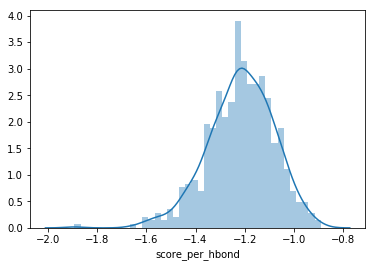

In [28]:
sns.distplot(score_per_hbond["score_per_hbond"], bins=40)

In [30]:
dscore.sort_values(by=["hbond_sc"])

fa_atr   fa_rep   fa_sol  \
description                                                             
34__input_0020_0005_2_0003_0005_0005_0005  -604.649  80.6799  433.907   
34__input_0020_0004_1_0005_0001_0005_0005  -604.560  88.6574  435.265   
41__input_0008_0002_4_0004_0001_0007_0010  -622.391  86.5276  442.890   
40__input_0182_0001_3_0005_0006_0010_0005  -628.922  90.8569  468.589   
1__input_0029_0004_1_0002_0004             -603.997  88.0412  417.493   
1__input_0178_0004_3_0002_0002_0007_0004   -630.423  86.7250  427.411   
5__input_0163_0001_8_0004_0009_0001_0010   -608.614  85.4458  424.449   
27__input_0044_0004_5_0005_0005_0005_0007  -622.092  87.3405  424.298   
7__input_0123_0003_5_0001_0003_0002_0001   -632.459  85.9777  454.264   
41__input_0008_0002_4_0004_0010            -629.650  90.0284  445.534   
27__input_0044_0004_5_0005_0005_0008_0002  -622.885  86.9256  434.877   
13__input_0166_0001_4_0002_0004_0004_0009  -621.539  81.7287  467.302   
29__input_0181_0004_1_0004_0002_0001_0009  -619.998  84.5367  445.836   
6__input_0085_0003_1_0005_0002_0002        -603.541  79.8352  423.637   
6__input_0181_0005_7_0003_0002_0008_0006   -595.375  78.9793  423.418   
1__input_0029_0004_2_0004_0010_0010_0001   -601.193  86.1841  434.142   
30__input_0014_0005_10_0004_0002_0003_0005 -608.675  85.6055  432.008   
13__input_0017_0005_2_0005_0001_0006_0010  -606.973  80.6674  431.914   
13__input_0166_0005_3_0005_0010_0001_0004  -576.416  78.3951  433.355   
4__input_0097_0004_1_0003_0008_0009_0005   -608.039  84.6535  445.777   
32__input_0133_0003_3_0002_0004_0004_0002  -620.471  84.0603  408.274   
48__input_0158_0004_4_0004_0007_0009_0003  -611.834  85.2614  449.758   
34__input_0020_0003_10_0004_0005_0006_0007 -605.438  83.3245  432.380   
43__input_0185_0005_1_0005_0008_0004_0006  -618.910  88.8126  430.189   
11__input_0191_0005_4_0001_0008_0010_0008  -585.746  84.2736  447.805   
32__input_0133_0003_11_0003_0006_0008_0003 -604.195  84.7766  443.457   
33__input_0063_0004_2_0004_0009_0001_0006  -575.851  79.8554  406.724   
6__input_0085_0003_1_0003_0008_0001_0002   -598.804  83.9866  429.118   
41__input_0008_0002_4_0004_0001_0005_0007  -612.835  87.6794  428.926   
31__input_0119_0002_2_0002_0001_0007_0007  -586.874  77.6099  433.859   
...                                             ...      ...      ...   
5__input_0163_0001_10_0005_0009_0009_0004  -601.051  81.8932  399.226   
33__input_0063_0005_1_0004_0009_0010_0003  -629.045  91.6872  376.617   
7__input_0123_0004_3_0004_0003_0009        -603.927  84.0122  390.760   
48__input_0034_0001_8_0002_0009_0010       -606.378  83.5500  423.233   
6__input_0181_0005_1_0004_0005_0008_0003   -623.581  89.9956  408.041   
4__input_0097_0004_1_0001_0005_0002_0001   -591.835  79.9984  387.415   
13__input_0177_0004_7_0005_0008_0008_0008  -648.628  95.3555  405.628   
38__input_0105_0005_5_0002_0007_0008_0004  -610.480  87.4218  422.894   
0__input_0001_0002_1_0004_0001_0008_0002   -625.893  87.4490  428.329   
11__input_0191_0001_2_0003_0004_0009_0008  -580.115  80.8460  402.602   
6__input_0119_0001_1_0002_0009_0005_0004   -604.498  88.3151  404.589   
47__input_0010_0005_2_0001_0006_0010_0002  -638.505  97.1610  422.444   
42__input_0033_0003_4_0003_0004_0002_0004  -609.829  85.0466  408.319   
43__input_0185_0005_3_0002_0004_0010_0002  -622.670  89.4788  418.466   
0__input_0001_0005_4_0001_0001_0008_0010   -612.528  86.7742  405.374   
33__input_0053_0005_1_0002_0007_0001_0004  -633.691  91.7501  406.040   
0__input_0001_0004_5_0002_0002_0002_0008   -609.949  84.0363  432.965   
0__input_0001_0002_1_0004_0001_0003_0002   -589.959  78.0116  426.804   
13__input_0157_0001_4_0003_0001_0007_0009  -610.831  85.4276  410.963   
32__input_0133_0004_7_0004_0003_0003_0010  -645.474  84.9759  421.251   
13__input_0177_0004_4_0003_0002_0001_0002  -604.427  81.7685  408.459   
15__input_0005_0004_7_0001_0006_0007_0004  -626.737  88.4382  418.002   
43__input_0185_0005_3_0002_000

In [31]:
score_per_hbond.sort_values(by=["score_per_hbond"])

score_per_hbond
13__input_0166_0003_4_0004_0004_0003_0003         -1.891271
32__input_0133_0003_10_0004_0001_0010             -1.654393
32__input_0133_0004_1_0004_0005_0008_0002         -1.611676
4__input_0078_0001_2_0001_0001_0005_0006          -1.604480
36__input_0117_0004_1_0004_0004                   -1.595614
32__input_0133_0004_8_0003_0010_0001_0006         -1.570647
13__input_0177_0004_4_0004_0002_0006_0001         -1.568937
30__input_0014_0005_10_0004_0002_0009             -1.562590
31__input_0119_0002_2_0002_0001_0003_0009         -1.559725
1__input_0172_0001_1_0004_0002_0001               -1.557559
34__input_0020_0004_1_0005_0001_0005_0005         -1.550030
13__input_0166_0003_4_0003_0003_0006              -1.530200
47__input_0037_0004_8_0002_0004_0007_0009         -1.520850
36__input_0117_0004_3_0003_0009_0007_0007         -1.514782
13__input_0157_0001_2_0004_0009_0010_0004         -1.505906
5__input_0163_0005_3_0004_0009_0003               -1.505783
1__input_0178_0004_2_0005_0007_0007_0002          -1.498733
34__input_0020_0003_11_0004_0002_0002_0003        -1.494722
31__input_0119_0002_2_0002_0001_0006_0009         -1.481484
0__input_0001_0005_4_0002_0002_0007_0001          -1.479250
7__input_0186_0001_1_0005_0001_0001_0006          -1.469435
1__input_0029_0004_2_0004_0010_0010_0001          -1.460423
6__input_0085_0003_1_0005_0003                    -1.459640
4__input_0098_0001_1_0004_0003_0003_0001          -1.457095
47__input_0010_0003_5_0003_0009_0009_0010         -1.454532
48__input_0158_0004_4_0004_0007_0009_0003         -1.448114
48__input_0158_0004_4_0003_0006_0004_0010         -1.447838
42__input_0033_0003_3_0001_0002_0005_0005         -1.447394
11__input_0191_0003_5_0002_0006_0006_0005         -1.445948
36__input_0117_0004_1_0004_0007_0002              -1.443244
...                                                     ...
3__input_0182_0003_2_0003_0009_0005_0005          -1.014865
3__input_0182_0003_2_0003_0009_0002_0005          -1.013810
0__input_0001_0002_1_0004_0001_0008_0002          -1.013237
47__input_0037_0003_3_0005_0007_0009_0009         -1.012750
25__input_0028_0005_1_0002_0006_0001_0005         -1.011655
0__input_0001_0004_5_0002_0002_0006_0008          -1.007755
40__input_0069_0002_1_0003_0002_0008_0006         -1.007195
0__input_0001_0004_1_0001_0007_0007_0009          -1.005123
47__input_0010_0005_2_0001_0006_0010_0002         -1.001632
41__input_0008_0002_4_0004_0001_0010_0003         -0.995800
35__input_0076_0002_7_0005_0002_0010_0005         -0.990590
4__input_0182_0001_3_0004_0005_0003_0004          -0.986437
11__input_0191_0003_1_0001_0001_0007_0003         -0.984937
43__input_0185_0005_3_0002_0004_0010_0002         -0.984163
6__input_0181_0002_4_0003_0002_0003_0003          -0.982762
33__input_0053_0005_1_0002_0007_0001_0004         -0.981058
4__input_0182_0001_3_0004_0005_0002_0010          -0.976936
35__input_0115_0004_1_0001_0010_0001_0001         -0.965965
42__input_0033_0003_4_0003_0004_0001_0003         -0.964015
47__input_0010_0005_3_0004_0006_0008_0008         -0.963173
20__input_0170_0005_1_0004_0006_0001_0002         -0.959959
3__input_0182_0003_2_0003_0009_0006_0010          -0.959322
6__input_0142_0005_1_0005_0003_0007_0010          -0.958388
47__input_0010_0002_4_0001_0008_0004_0004         -0.955544
34__input_0020_0003_5_0004_0007_0009_0002         -0.938748
30__input_0014_0002_2_0002_0007_0009_0006         -0.938429
4__input_0097_0005_1_0005_0005_0001_0005          -0.930200
27__input_0044_0004_5_0005_0005_0009_0010         -0.924942
43__input_0185_0005_3_0002_0004_0008_0001         -0.901665
43__input_0185_0005_3_0002_0004_0002_0004         -0.891690

[574 rows x 1 columns]

In [5]:
dscore = pd.concat([dscore, score_per_hbond], axis=1)
print(dscore)

                                             fa_atr   fa_rep   fa_sol  \
description                                                             
48__input_0034_0001_8_0002_0009_0007_0008  -589.527  79.9200  416.804   
34__input_0020_0003_11_0004_0002_0002_0003 -604.430  85.9471  407.885   
17__input_0087_0002_4_0003_0008_0003_0003  -624.212  83.2744  390.798   
13__input_0017_0005_2_0005_0001_0003_0006  -592.194  78.6864  398.596   
5__input_0163_0005_3_0004_0009_0002_0009   -577.851  80.1489  401.515   
47__input_0010_0002_4_0001_0008_0006_0002  -595.474  82.8794  398.335   
31__input_0119_0002_1_0005_0010_0003_0002  -598.737  85.5667  427.415   
47__input_0037_0004_8_0002_0004_0010_0006  -619.176  88.9892  423.635   
6__input_0142_0005_1_0005_0003_0002_0010   -590.736  82.5348  413.732   
13__input_0135_0004_3_0002_0009_0004_0002  -620.510  85.6329  427.719   
31__input_0125_0001_1_0002_0001_0009_0009  -604.888  83.7284  412.767   
45__input_0044_0001_1_0001_0003_0001_0002  -620.249

In [33]:
dscore.sort_values(by=["score_per_hbond"])

fa_atr   fa_rep   fa_sol  \
description                                                             
13__input_0166_0003_4_0004_0004_0003_0003  -613.418  85.5090  432.176   
32__input_0133_0003_10_0004_0001_0010      -589.430  75.2115  383.639   
32__input_0133_0004_1_0004_0005_0008_0002  -607.069  82.9333  427.536   
4__input_0078_0001_2_0001_0001_0005_0006   -594.964  82.2522  411.284   
36__input_0117_0004_1_0004_0004            -596.838  82.3737  403.345   
32__input_0133_0004_8_0003_0010_0001_0006  -603.345  79.2700  415.909   
13__input_0177_0004_4_0004_0002_0006_0001  -606.721  83.3719  407.192   
30__input_0014_0005_10_0004_0002_0009      -605.721  84.9323  414.734   
31__input_0119_0002_2_0002_0001_0003_0009  -590.857  79.6520  431.315   
1__input_0172_0001_1_0004_0002_0001        -587.163  79.2892  405.087   
34__input_0020_0004_1_0005_0001_0005_0005  -604.560  88.6574  435.265   
13__input_0166_0003_4_0003_0003_0006       -600.133  82.1576  429.204   
47__input_0037_0004_8_0002_0004_0007_0009  -621.463  87.4000  425.907   
36__input_0117_0004_3_0003_0009_0007_0007  -602.981  79.3721  408.558   
13__input_0157_0001_2_0004_0009_0010_0004  -597.021  79.7923  412.169   
5__input_0163_0005_3_0004_0009_0003        -594.099  82.4268  413.129   
1__input_0178_0004_2_0005_0007_0007_0002   -621.330  91.8360  420.051   
34__input_0020_0003_11_0004_0002_0002_0003 -604.430  85.9471  407.885   
31__input_0119_0002_2_0002_0001_0006_0009  -606.033  86.0563  421.262   
0__input_0001_0005_4_0002_0002_0007_0001   -610.077  80.6091  428.822   
7__input_0186_0001_1_0005_0001_0001_0006   -590.464  82.8135  405.333   
1__input_0029_0004_2_0004_0010_0010_0001   -601.193  86.1841  434.142   
6__input_0085_0003_1_0005_0003             -592.715  76.1484  430.975   
4__input_0098_0001_1_0004_0003_0003_0001   -601.726  85.8229  404.391   
47__input_0010_0003_5_0003_0009_0009_0010  -592.287  76.5513  416.489   
48__input_0158_0004_4_0004_0007_0009_0003  -611.834  85.2614  449.758   
48__input_0158_0004_4_0003_0006_0004_0010  -629.258  84.4901  437.812   
42__input_0033_0003_3_0001_0002_0005_0005  -590.349  80.1342  452.271   
11__input_0191_0003_5_0002_0006_0006_0005  -610.920  89.2249  417.397   
36__input_0117_0004_1_0004_0007_0002       -595.602  80.0788  418.199   
...                                             ...      ...      ...   
3__input_0182_0003_2_0003_0009_0005_0005   -599.930  89.9189  406.651   
3__input_0182_0003_2_0003_0009_0002_0005   -595.403  88.6731  406.513   
0__input_0001_0002_1_0004_0001_0008_0002   -625.893  87.4490  428.329   
47__input_0037_0003_3_0005_0007_0009_0009  -629.146  96.9183  375.408   
25__input_0028_0005_1_0002_0006_0001_0005  -624.306  90.5837  409.113   
0__input_0001_0004_5_0002_0002_0006_0008   -615.995  82.5197  423.168   
40__input_0069_0002_1_0003_0002_0008_0006  -616.733  92.7265  390.453   
0__input_0001_0004_1_0001_0007_0007_0009   -616.421  88.7624  419.155   
47__input_0010_0005_2_0001_0006_0010_0002  -638.505  97.1610  422.444   
41__input_0008_0002_4_0004_0001_0010_0003  -614.568  85.8438  450.715   
35__input_0076_0002_7_0005_0002_0010_0005  -625.791  89.4024  422.123   
4__input_0182_0001_3_0004_0005_0003_0004   -605.106  86.7993  455.924   
11__input_0191_0003_1_0001_0001_0007_0003  -587.630  86.6150  441.579   
43__input_0185_0005_3_0002_0004_0010_0002  -622.670  89.4788  418.466   
6__input_0181_0002_4_0003_0002_0003_0003   -608.552  80.5703  419.747   
33__input_0053_0005_1_0002_0007_0001_0004  -633.691  91.7501  406.040   
4__input_0182_0001_3_0004_0005_0002_0010   -610.957  82.3801  458.564   
35__input_0115_0004_1_0001_0010_0001_0001  -593.552  83.1909  437.129   
42__input_0033_0003_4_0003_0004_0001_0003  -622.794  91.7244  418.723   
47__input_0010_0005_3_0004_0006_0008_0008  -569.992  77.7845  413.738   
20__input_0170_0005_1_0004_0006_0001_0002  -588.656  81.9236  427.044   
3__input_0182_0003_2_0003_0009_0006_0010   -604.181  89.3212  405.119   
6__input_0142_0005_1_0005_0003

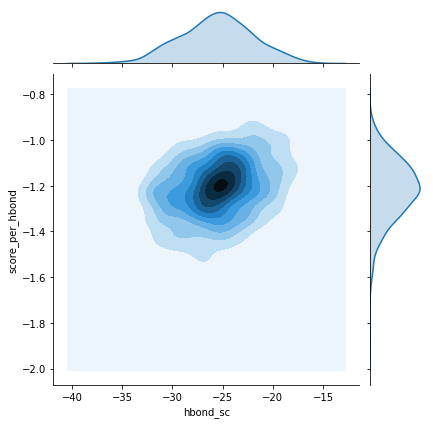

In [34]:
sns.jointplot("hbond_sc", "score_per_hbond", dscore, kind='kde')

In [35]:
dscore.sort_values(by=["omega"])

fa_atr   fa_rep   fa_sol  \
description                                                             
29__input_0181_0004_1_0004_0002_0002_0004  -590.934  78.8045  433.748   
30__input_0160_0001_1_0002_0003            -588.581  87.2454  414.628   
46__input_0133_0002_2_0005_0005_0004_0007  -585.295  78.0445  403.916   
40__input_0108_0004_1_0001_0010_0006_0010  -609.241  88.5808  426.660   
13__input_0135_0002_2_0003_0009            -604.408  75.4328  427.355   
28__input_0038_0004_1_0001_0004_0007_0005  -587.664  82.6781  378.927   
5__input_0163_0001_6_0003_0007_0002_0003   -609.558  83.5488  404.502   
13__input_0157_0001_2_0004_0009_0004       -574.790  81.8176  384.072   
32__input_0133_0003_10_0005_0006_0002_0004 -600.675  84.9890  422.013   
40__input_0182_0001_3_0001_0010_0003_0004  -610.721  88.5937  434.088   
41__input_0008_0004_1_0004_0006_0002_0002  -613.477  88.1549  429.142   
4__input_0098_0001_1_0004_0003_0003_0001   -601.726  85.8229  404.391   
13__input_0157_0005_3_0003_0006_0010_0003  -609.668  81.5050  402.482   
11__input_0191_0003_3_0002_0002_0001_0009  -618.131  93.0114  419.396   
1__input_0029_0004_2_0005_0008_0001_0009   -566.779  83.5629  416.131   
28__input_0038_0004_1_0001_0004_0003_0008  -575.855  87.2677  384.728   
30__input_0160_0001_1_0001_0007            -576.226  77.1513  405.203   
32__input_0133_0003_3_0001_0008_0010_0004  -589.233  79.4736  427.653   
34__input_0020_0005_2_0003_0005_0005_0005  -604.649  80.6799  433.907   
40__input_0069_0002_1_0003_0002_0008_0006  -616.733  92.7265  390.453   
32__input_0133_0003_7_0004_0005_0001_0008  -609.238  86.7335  437.005   
42__input_0033_0003_4_0003_0004_0001_0003  -622.794  91.7244  418.723   
31__input_0119_0005_4_0004_0005_0010_0005  -615.736  85.1224  400.511   
6__input_0085_0003_1_0005_0002_0002        -603.541  79.8352  423.637   
13__input_0157_0001_4_0003_0001_0007_0009  -610.831  85.4276  410.963   
1__input_0172_0001_1_0004_0002_0001        -587.163  79.2892  405.087   
3__input_0182_0003_5_0003_0007_0002_0009   -604.894  83.2980  421.198   
13__input_0157_0001_2_0004_0009_0007_0003  -576.179  81.5178  396.364   
33__input_0053_0004_2_0005_0007_0004_0009  -597.993  80.8958  404.508   
20__input_0170_0005_1_0004_0006_0008_0002  -578.592  86.1720  413.426   
...                                             ...      ...      ...   
17__input_0150_0002_2_0002_0003_0008_0009  -587.924  82.4368  413.781   
47__input_0010_0005_1_0002_0008_0006_0008  -608.019  86.1037  405.419   
25__input_0198_0002_1_0004_0004_0003_0004  -599.923  84.7664  409.687   
35__input_0076_0002_2_0001_0001_0003_0008  -596.825  86.1019  422.530   
47__input_0037_0004_6_0004_0001_0010_0005  -603.792  84.5107  415.248   
35__input_0076_0002_2_0001_0001_0001       -613.915  88.1130  411.340   
4__input_0097_0001_2_0005_0007_0007_0006   -625.236  90.2610  414.868   
35__input_0076_0002_2_0001_0001_0007_0008  -619.850  89.3367  420.080   
49__input_0046_0001_1_0005_0009_0008_0008  -607.569  89.3551  444.302   
0__input_0001_0004_1_0001_0007_0007_0009   -616.421  88.7624  419.155   
36__input_0117_0004_1_0004_0004            -596.838  82.3737  403.345   
2__input_0102_0001_1_0004_0010_0005_0003   -593.387  77.1268  421.754   
43__input_0185_0005_1_0001_0010_0008_0008  -601.701  86.8763  431.412   
11__input_0191_0001_2_0003_0004_0005_0006  -587.203  84.9511  415.081   
43__input_0055_0003_2_0005_0005            -610.489  83.0936  408.822   
15__input_0005_0004_7_0001_0006_0007_0004  -626.737  88.4382  418.002   
7__input_0186_0001_1_0001_0007_0002_0001   -598.203  82.2976  448.178   
4__input_0182_0001_3_0004_0005_0003_0004   -605.106  86.7993  455.924   
17__input_0087_0002_4_0003_0008_0003_0003  -624.212  83.2744  390.798   
4__input_0078_0004_2_0002_0004_0005_0008   -624.052  91.5889  406.545   
2__input_0102_0003_1_0002_0010_0005_0006   -605.761  79.2042  411.009   
17__input_0150_0002_2_0004_0008_0002       -619.934  91.5271  430.443   
7__input_0186_0001_2_0005_0005

In [8]:
dgood_hbond = dscore.loc[dscore["hbond_sc"] <= -22.0]
dgood_hbond.shape

(488, 21)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


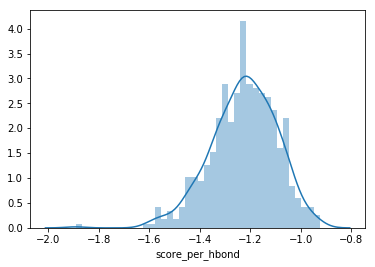

In [9]:
sns.distplot(dgood_hbond["score_per_hbond"], bins=40)

In [11]:
from shutil import copyfile

for index,row in dgood_hbond:
    pdb = row.index + ".pdb"
    source = "round4/" + pdb
    target = "round4/best_hbond/" + pdb
    copyfile(source, target)

In [12]:
dbad_hbond = dscore.loc[dscore["hbond_sc"] > -22.0]
dbad_hbond.shape

(83, 21)

In [15]:
from shutil import copyfile

for model in dbad_hbond.index:
    pdb = model + ".pdb"
    source = "round4/" + pdb
    target = "round4/worst_hbond/" + pdb
    copyfile(source, target)

In [8]:
score_names = ["description","fa_atr","fa_rep","fa_sol","fa_intra_rep","fa_intra_sol_xover4","lk_ball_wtd","fa_elec","pro_close","hbond_sr_bb","hbond_lr_bb","hbond_bb_sc","hbond_sc","dslf_fa13","omega","fa_dun","p_aa_pp","yhh_planarity","ref","rama_prepro","total"]
dclusterG = pd.DataFrame(columns=score_names)

for design in glob.glob("round4/best_hbond/clusterI/*.pdb"):
    pdb_name = os.path.basename(design)
    description = os.path.splitext(pdb_name)[0]
    scores_list = [description]
    with open(design, 'r') as pdb_in:
        for line in pdb_in:
            if "pose " in line:
                scores = [float(x) for x in line.replace("pose ", "").split(" ")]
                scores_list += scores
                ds = pd.DataFrame([scores_list], columns=score_names)
                dclusterG = dclusterG.append(ds, ignore_index=True)
dclusterG = dclusterG.set_index("description")
print(dclusterG.sort_values(by=["total"]))
                

                                            fa_atr   fa_rep   fa_sol  \
description                                                            
33__input_0063_0005_1_0001_0001_0002_0002 -640.021  93.9989  418.743   
31__input_0119_0005_1_0003_0005_0001_0005 -590.901  81.6037  422.361   
43__input_0107_0004_1_0002_0008_0009_0008 -586.228  79.4450  427.673   
13__input_0157_0004_1_0001_0003_0008_0007 -566.046  76.1788  417.481   

                                           fa_intra_rep  fa_intra_sol_xover4  \
description                                                                    
33__input_0063_0005_1_0001_0001_0002_0002       1.31638              19.0976   
31__input_0119_0005_1_0003_0005_0001_0005       1.16700              20.6663   
43__input_0107_0004_1_0002_0008_0009_0008       1.07261              18.8805   
13__input_0157_0004_1_0001_0003_0008_0007       1.15369              19.1216   

                                           lk_ball_wtd  fa_elec  pro_close  \
descript

In [11]:
with open("round4/best_hbond/unique/designs.fasta", 'r') as fasta:
    for line in fasta:
        if line[0] == ">":
            design = line[1:].strip()
            design_name = design.replace(".pdb","")
            sequence = next(fasta).strip()
            resfile = "round4/best_hbond/unique/" + design_name + "/all.resfile"
            with open("round4/best_hbond/unique/all.resfile", 'r') as in_resfile:
                with open(resfile, 'w') as out_resfile:
                    for line in in_resfile:
                        pos = line.split(" ")[0]
                        try:
                            pos = int(pos)
                            if sequence[pos-1] == "G":
                                out_resfile.write("# " + line)
                            else:
                                out_resfile.write(line)
                        except:
                            out_resfile.write(line)